## Analisis y visualizaciones


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Se importan las librerias para realizar el respectivo analisis

Se cambia el tipo de formato que presenta la base de datos que se limpió previamente y se confirma que sea la base de datos limpia

In [ ]:
df = pd.read_csv("/content/medicamentos_homeopaticos_limpio.csv")
df.to_json("/content/medicamentos_homeopaticos_limpio.json", orient="records", force_ascii=False)

df = pd.read_json("/content/medicamentos_homeopaticos_limpio.json")
df.head()

,EXPEDIENTE,REGISTRO_SANITARIO,PRODUCTO,TIPOPRODUCTO,TIPO_IDENTIFICACION_TITULAR,IDENTIFICACION_TITULAR,TITULAR,DIRECCIÓN_TITULAR,CIUDAD_TITULAR,ROL,MODALIDAD,ESTADO_REGISTRO,PRINCIPIO_ACTIVO,FORMA_FARMACEUTICA,USOTERAPEUTICO,INDICACIONES,CONDICION_VENTA,VIAUTIL,PRESENTACIONCOMERCIAL
0,207398,NO REPORTA,EXTRACTO DE VALERIANA,NO REPORTA,NI,8.603.519.554,LABORATORIOS PRONABELL S A S,CARRERA 12 NO 24 B - 45,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,VALERIANA,SOLUCION ORAL,NO APLICA,SEDANTE,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA POR UN FRASCO DE COLOR AMBAR TIPO II POR ...
1,207276,NO REPORTA,ARLELLIUM,NO REPORTA,NI,8.603.519.654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,EXTRACTO SECO DE AJO,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,NO REPORTA,FRASCO POR 30 Y 120 ML
2,206425,NO REPORTA,DIULED,NO REPORTA,NI,8.603.519.654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,FUNZA,FABRICANTE,FABRICAR Y VENDER,NEGADO,MATERIAL HS TARAXACUM OFFICINALE DIENTE DE LEÓN,JARABE,NO APLICA,DIURÉTICO,SIN FORMULA FACULTATIVA,2 AÑOS,CAJA DE CARTON CON UN FRASCO DE VIDRIO TIPO II...
3,204949,INVIMA 2001N-0000008,BRONQUIOLIV MALVA SYLVESTRIS - MALVA,NO REPORTA,NI,8.603.519.654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,MALVA MALVA SYLVESTRIS - HOJAS Y FLORES,SOLUCION ORAL,EXPECTORANTE,NO REPORTA,SIN FORMULA FACULTATIVA,1 AÑO,CAJA POR UN FRASCO DE VIDRIO TIPO II COLOR AMB...
4,216969,INVIMA 2002N-0000105,TARAXACUM OFFICINALIS DIENTE DE LEON SOLUCION ...,NO REPORTA,NI,8.603.519.654,LABORATORIOS PRONABELL LTDA,CARRERA 12 NO 24B 45,FUNZA,FABRICANTE,FABRICAR Y VENDER,VENCIDO,EXTRACTO SECO DE DIENTE DE LEON TARAXACUM OFFI...,SOLUCION ORAL,DIURETICO,NO REPORTA,SIN FORMULA FACULTATIVA,1 AÑO,CAJA CON UN FRASCO DE VIDRIO TIPO II COLOR AMB...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29324 entries, 0 to 29323
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   EXPEDIENTE                   29324 non-null  int64 
 1   REGISTRO_SANITARIO           29324 non-null  object
 2   PRODUCTO                     29324 non-null  object
 3   TIPOPRODUCTO                 29324 non-null  object
 4   TIPO_IDENTIFICACION_TITULAR  29324 non-null  object
 5   IDENTIFICACION_TITULAR       29324 non-null  object
 6   TITULAR                      29324 non-null  object
 7   DIRECCIÓN_TITULAR            29324 non-null  object
 8   CIUDAD_TITULAR               29324 non-null  object
 9   ROL                          29324 non-null  object
 10  MODALIDAD                    29324 non-null  object
 11  ESTADO_REGISTRO              29324 non-null  object
 12  PRINCIPIO_ACTIVO             29324 non-null  object
 13  FORMA_FARMACEUTICA           29

Se confirma que todos los datos nulos fueron omitidos

In [ ]:
df.isnull().sum()

,0
EXPEDIENTE,0
REGISTRO_SANITARIO,0
PRODUCTO,0
TIPOPRODUCTO,0
TIPO_IDENTIFICACION_TITULAR,0
IDENTIFICACION_TITULAR,0
TITULAR,0
DIRECCIÓN_TITULAR,0
CIUDAD_TITULAR,0
ROL,0


In [ ]:
df.shape

(29324, 19)

In [ ]:
df.columns


Index(['EXPEDIENTE', 'REGISTRO_SANITARIO', 'PRODUCTO', 'TIPOPRODUCTO',
       'TIPO_IDENTIFICACION_TITULAR', 'IDENTIFICACION_TITULAR', 'TITULAR',
       'DIRECCIÓN_TITULAR', 'CIUDAD_TITULAR', 'ROL', 'MODALIDAD',
       'ESTADO_REGISTRO', 'PRINCIPIO_ACTIVO', 'FORMA_FARMACEUTICA',
       'USOTERAPEUTICO', 'INDICACIONES', 'CONDICION_VENTA', 'VIAUTIL',
       'PRESENTACIONCOMERCIAL'],
      dtype='object')

In [ ]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
    .str.normalize('NFKD')
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
)


In [ ]:
df.columns
'estado_registro'


'estado_registro'

In [ ]:
conteo_estado = df['estado_registro'].value_counts()
conteo_estado


,count
estado_registro,
VIGENTE,10815
NEGADO,5678
EN TRAMITE RENOV,4740
VENCIDO,4607
ABANDONO,1892
EN ESTUDIO,1391
CANCELADO,133
PERDIDA FUERZA EJEC,62
DESISTIDO,6


se verifico que exixtiera la columna de estado de registro y el conteo de las variables en este.

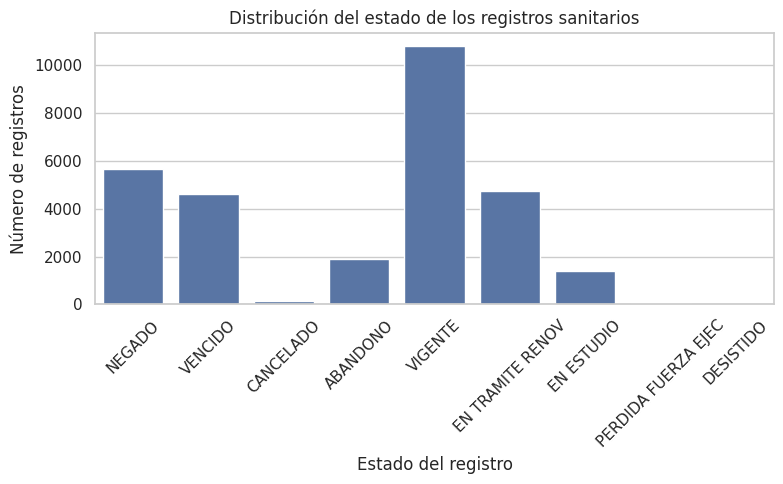

In [ ]:


plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='estado_registro'
)

plt.title('Distribución del estado de los registros sanitarios')
plt.xlabel('Estado del registro')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


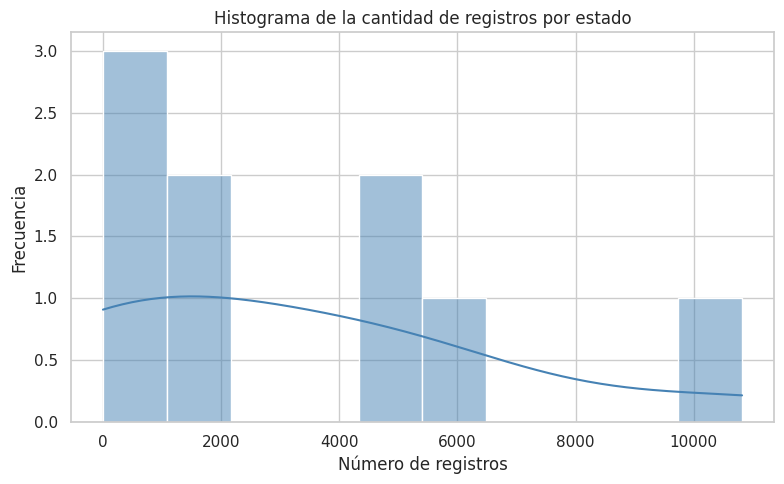

In [ ]:
conteos_estado = df['estado_registro'].value_counts().values

plt.figure(figsize=(8,5))
sns.histplot(
    conteos_estado,
    bins=10,
    kde=True,
    color='steelblue'
)

plt.title('Histograma de la cantidad de registros por estado')
plt.xlabel('Número de registros')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



El histograma muestra la distribución del número de registros sanitarios por estado regulatorio. Se observa una concentración de valores en determinados rangos, lo que evidencia una distribución desigual de los registros entre las categorías, con predominio de algunos estados frente a otros.

/tmp/ipython-input-2623382589.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


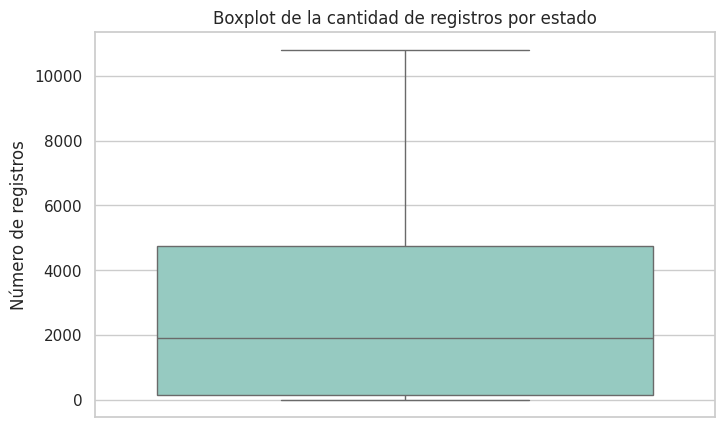

In [ ]:
conteos = df['estado_registro'].value_counts().reset_index()
conteos.columns = ['estado_registro', 'cantidad_registros']

plt.figure(figsize=(8,5))
sns.boxplot(
    data=conteos,
    y='cantidad_registros',
    palette='Set3'
)

plt.title('Boxplot de la cantidad de registros por estado')
plt.ylabel('Número de registros')
plt.show()



El boxplot muestra la dispersión en la cantidad de registros sanitarios por estado regulatorio, evidenciando diferencias significativas entre categorías

/tmp/ipython-input-3995990914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


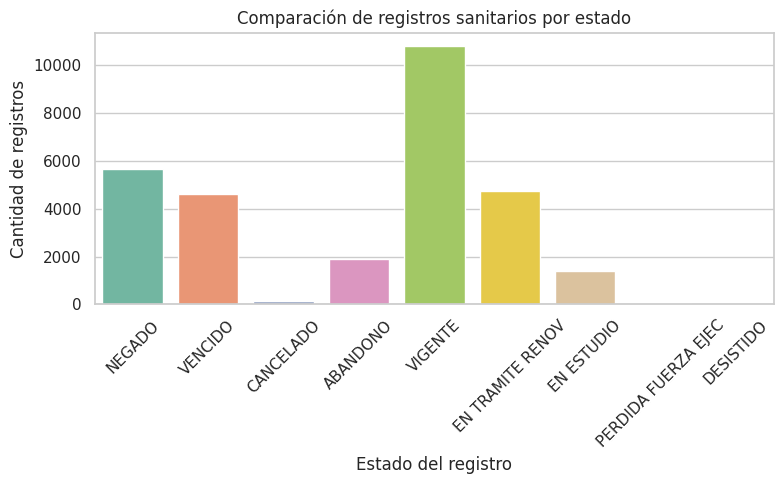

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='estado_registro',
    palette='Set2'
)

plt.title('Comparación de registros sanitarios por estado')
plt.xlabel('Estado del registro')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico comparativo permite evidenciar diferencias significativas en la cantidad de registros sanitarios según el estado regulatorio del medicamento. Se observa que el estado VIGENTE concentra la mayor proporción de registros, lo cual indica que la mayoría de los medicamentos homeopáticos analizados cuentan con autorización sanitaria activa.